In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

In [2]:
pd.set_option('display.max_column', None)
pd.set_option('display.max_row', None)

In [3]:
%matplotlib inline
plt.rcParams['figure.figsize'] = (8.0, 6.0) # set default size of plots
plt.rcParams['image.interpolation'] = 'nearest'
plt.rcParams['image.cmap'] = 'gray'
plt.style.use('seaborn')

In [ ]:
<img src='0_tVCene42rgUTNv9Q.png' style="width:482px;height:138px;">

### 1) Import Package

In [3]:
import fbprophet
from fbprophet import Prophet
from fbprophet.plot import add_changepoints_to_plot, plot_cross_validation_metric
from fbprophet.diagnostics import cross_validation, performance_metrics

In [4]:
# chart to visulaize 
def compare_chart(compare):
    plt.figure(figsize=(16,12))
    plt.plot(compare['ds'], compare['y'], color='g')
    plt.plot(compare['ds'], compare['yhat'], color='red')
    plt.xlabel('Time')
    plt.ylabel('Daily Signup Volume')
    plt.gca().legend(('Actual','Forecast'))
    plt.title('OT Daily Signup Forecast w Prophet')
    return 

In [5]:
# functions to measure performance of model
def mean_absolute_percentage_error(y_true, y_pred):
    #take in actual and predicted values and calculate the Mean Absolute Percentage Error score
    y_true, y_pred = np.array(y_true), y_pred
    return np.mean(np.abs((y_true - y_pred)/y_true))*100

In [6]:
def mape(model):
    cv_results = cross_validation(model, initial='730 days', period='180 days', horizon='365 days') 
    mape_baseline = mean_absolute_percentage_error(cv_results.y, cv_results.yhat)
    return mape_baseline, cv_results

### 2) Exploratory Work 

**_Use daily OT signups from 01/01/2015 to 04/23/2019 for case study_**

In [7]:
df = pd.read_csv(r'C:\Users\jli\Documents\JLI\Code & Examples\fbprophet\ot_signup.csv', parse_dates=['ds'])

In [8]:
df.shape

(1574, 2)

In [9]:
# it must have two columns, ds and y
df.head(5)

,ds,y
0,2015-01-01,2888
1,2015-01-02,4381
2,2015-01-03,3411
3,2015-01-04,3359
4,2015-01-05,4675


In [10]:
df.dtypes

ds    datetime64[ns]
y              int64
dtype: object

In [16]:
df['ds'].describe()

count                    1574
unique                   1574
top       2015-07-19 00:00:00
freq                        1
first     2015-01-01 00:00:00
last      2019-04-23 00:00:00
Name: ds, dtype: object

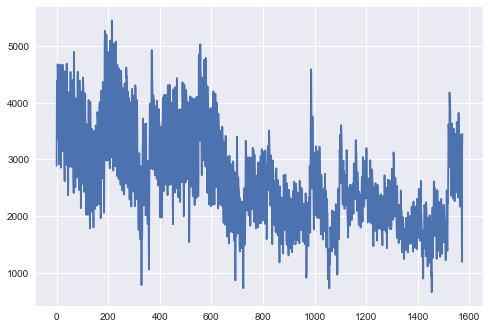

In [25]:
plt.plot(df['y'])

### 3) Prophet Model Quick Start

In [14]:
# use default setting to generate the first model
m0 = Prophet()
m0.fit(df)

C:\anaconda36\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\anaconda36\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


In [17]:
future = m0.make_future_dataframe(periods=365)
# The predict method will assign each row in future a predicted value which it names yhat
forecast = m0.predict(future)
forecast[['ds', 'yhat', 'yhat_lower', 'yhat_upper']].tail(10)

,ds,yhat,yhat_lower,yhat_upper
1929,2020-04-13,3123.083474,2474.682887,3709.751031
1930,2020-04-14,3078.591332,2479.053523,3726.047439
1931,2020-04-15,2998.141926,2409.223270,3615.257604
1932,2020-04-16,2873.584540,2301.076562,3489.957618
1933,2020-04-17,2611.637386,1982.049864,3246.881618
1934,2020-04-18,1983.828762,1357.999289,2523.292376
1935,2020-04-19,1843.633576,1264.519526,2475.196159
1936,2020-04-20,3009.552097,2414.843379,3622.694441
1937,2020-04-21,2962.338664,2336.481018,3591.175563
1938,2020-04-22,2880.258644,2273.247246,3514.934550


In [18]:
forecast.shape

(1939, 19)

In [19]:
forecast.columns

Index(['ds', 'trend', 'yhat_lower', 'yhat_upper', 'trend_lower', 'trend_upper',
       'additive_terms', 'additive_terms_lower', 'additive_terms_upper',
       'weekly', 'weekly_lower', 'weekly_upper', 'yearly', 'yearly_lower',
       'yearly_upper', 'multiplicative_terms', 'multiplicative_terms_lower',
       'multiplicative_terms_upper', 'yhat'],
      dtype='object')

In [28]:
forecast[['ds','yhat']].head(5)

,ds,yhat
0,2015-01-01,3635.270748
1,2015-01-02,3441.949694
2,2015-01-03,2883.911568
3,2015-01-04,2813.772822
4,2015-01-05,4049.155146


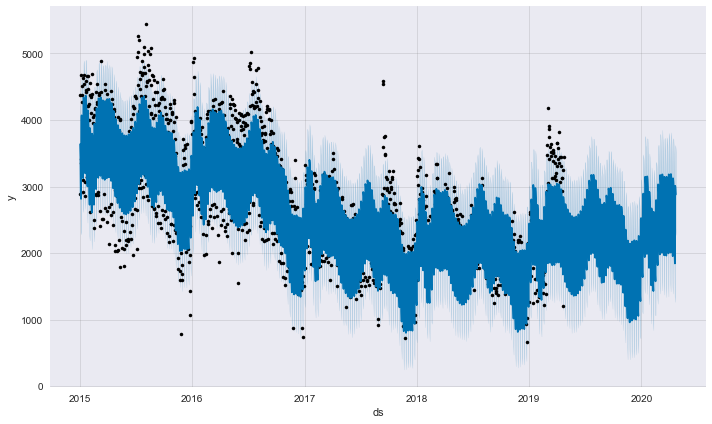

In [26]:
fig1 = m0.plot(forecast)

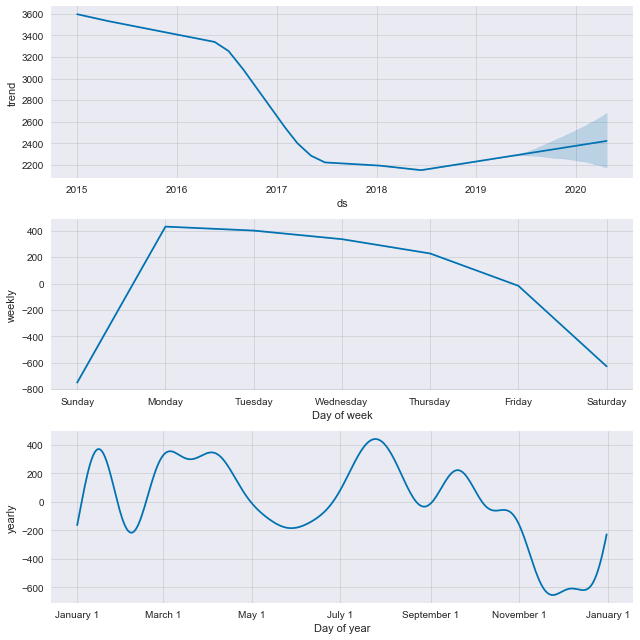

In [27]:
# forecast component
fig2 = m0.plot_components(forecast)

In [28]:
mape_baseline, cv_results = mape(m0)

INFO:fbprophet:Making 3 forecasts with cutoffs between 2017-04-28 00:00:00 and 2018-04-23 00:00:00
C:\anaconda36\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\anaconda36\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):
C:\anaconda36\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\anaconda36\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In

In [29]:
print(mape_baseline)

32.23316393245212


In [30]:
performance_results = performance_metrics(cv_results)
performance_results.head()

,horizon,mse,rmse,mae,mape,coverage
36,37 days,173991.143512,417.122456,321.318624,0.180599,0.770642
766,37 days,174365.612339,417.571087,321.861028,0.180379,0.770642
401,37 days,176162.646188,419.717341,324.178048,0.182221,0.761468
37,38 days,176266.554877,419.841107,324.787410,0.182399,0.761468
767,38 days,173109.696052,416.064534,321.065206,0.180251,0.770642


Prophet includes functionality for time series cross validation to measure forecast error using historical data. This is done by selecting cutoff points in the history, and for each of them fitting the model using data only up to that cutoff point. We can then compare the forecasted values to the actual values. 

https://facebook.github.io/prophet/docs/diagnostics.html

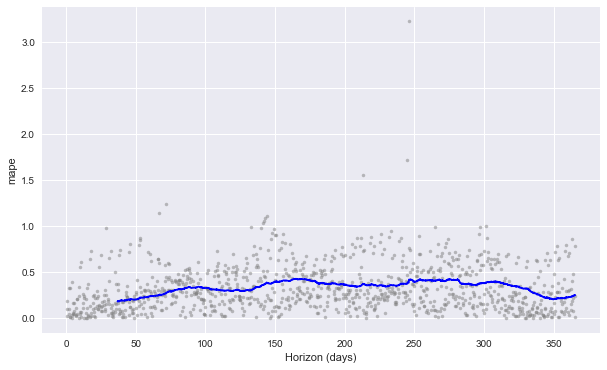

In [31]:
# from fbprophet.plot import plot_cross_validation_metric
fig = plot_cross_validation_metric(cv_results, metric='mape', rolling_window=.1)

### 4) Forecast w Holdout Data w Customized Parameters

In [32]:
df = pd.read_csv(r'C:\Users\jli\Documents\JLI\Code & Examples\fbprophet\ot_signup.csv', parse_dates=['ds'], nrows=1209)

In [33]:
df2 = pd.read_csv(r'C:\Users\jli\Documents\JLI\Code & Examples\fbprophet\ot_signup.csv', parse_dates=['ds'])

In [34]:
df2.shape

(1574, 2)

### 4) 1. Beline Model

### Parameters 

**growth**
- linear if data has no saturation insight or logistic for curve showing promise of saturation
- If use logistic, must provide the cap (maximum value your data will reach) and floor (minimum value)
- Talk to domain expert to set up accurate caps and floors

**holidays**
- Holiday data should have the same form as the target data

**holidays_prior_scale**
- This parameter determines how much of an effect holidays should have on the prediction
- Default is 10, feel free to try values between 20 and 40 if you believe holidays have a big effect

**changepoint_range, n_changepoints, changepoint_prior_scale**
- changepoint_range: the range of data used for setting changepoints. By default changepoints are only inferred for the first 80% of the time series in order to have plenty of runway for projecting the trend forward and to avoid overfitting fluctuations at the end of the time series.
- changepoint_prior_scale, is there to indicate how flexible the changepoints are allowed to be. By default, this parameter is set to 0.05. Increasing it will make the trend more flexible
- n_changepoints: number of changepoints 

**seasonalities**
- additive: use additive when your seasonality trend should be “constant” over the entire period. For example, when you want your yearly trend growth impact to be the same as in 2010 as it is in 2018
- multiplicative: use this to increase the importance of the seasonalities over time

In [35]:
m1 = Prophet(growth='linear',
             changepoint_range=0.9, #default 0.8
             n_changepoints=30, #default is 25
             changepoint_prior_scale=0.12, # default 0.05
             holidays_prior_scale=0.2
           )
            
m1.fit(df)

C:\anaconda36\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\anaconda36\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


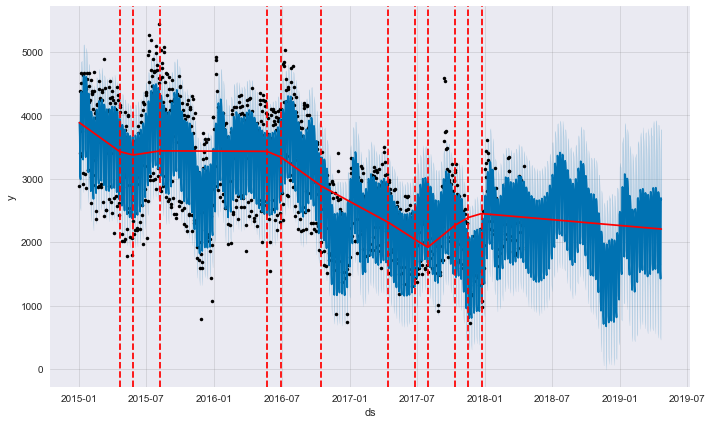

In [36]:
future = m1.make_future_dataframe(periods=365)
forecast = m1.predict(future)
fig1_1 = m1.plot(forecast)
a = add_changepoints_to_plot(fig1_1.gca(), m1, forecast)

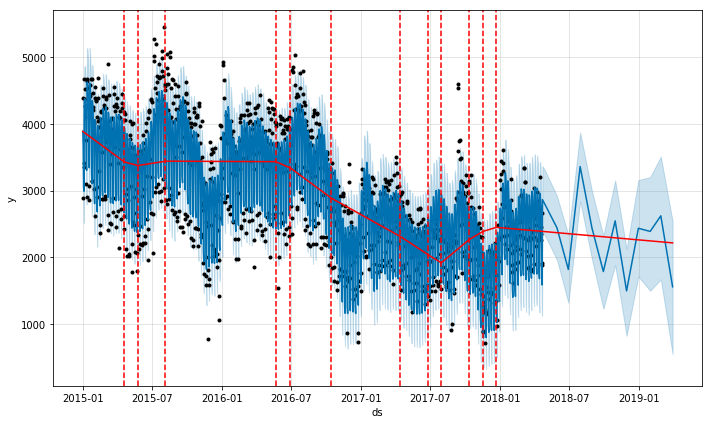

In [194]:
# future = m1.make_future_dataframe(periods=12, freq='m')
# forecast = m1.predict(future)
# fig1_2 = m1.plot(forecast)
# a = add_changepoints_to_plot(fig1_2.gca(), m1, forecast)

In [38]:
m1.changepoints

36     2015-02-06
72     2015-03-14
109    2015-04-20
145    2015-05-26
181    2015-07-01
217    2015-08-06
254    2015-09-12
290    2015-10-18
326    2015-11-23
362    2015-12-29
399    2016-02-04
435    2016-03-11
471    2016-04-16
507    2016-05-22
544    2016-06-28
580    2016-08-03
616    2016-09-08
652    2016-10-14
688    2016-11-19
725    2016-12-26
761    2017-01-31
797    2017-03-08
833    2017-04-13
870    2017-05-20
906    2017-06-25
942    2017-07-31
978    2017-09-05
1015   2017-10-12
1051   2017-11-17
1087   2017-12-23
Name: ds, dtype: datetime64[ns]

In [39]:
test_changepoint = pd.Series.to_frame(m1.changepoints).reset_index()

In [40]:
test_changepoint

,index,ds
0,36,2015-02-06
1,72,2015-03-14
2,109,2015-04-20
3,145,2015-05-26
4,181,2015-07-01
5,217,2015-08-06
6,254,2015-09-12
7,290,2015-10-18
8,326,2015-11-23
9,362,2015-12-29


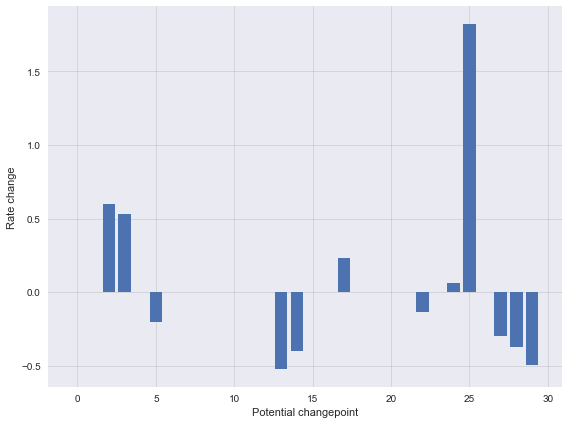

In [41]:
deltas = m1.params['delta'].mean(0)
fig = plt.figure(facecolor='w', figsize=(8,6))
# plt.figure(figsize=(12,10))
ax = fig.add_subplot(111)
ax.bar(range(len(deltas)), deltas)
ax.grid(True, which='major', c='gray', ls='-', lw=1, alpha=0.2)
ax.set_ylabel('Rate change')
ax.set_xlabel('Potential changepoint')
fig.tight_layout()

In [42]:
test_changepoint['deltas']=deltas

In [43]:
test_changepoint[np.abs(test_changepoint['deltas'])>0.0001]

,index,ds,deltas
2,109,2015-04-20,0.599064
3,145,2015-05-26,0.529369
5,217,2015-08-06,-0.205435
13,507,2016-05-22,-0.525539
14,544,2016-06-28,-0.399297
17,652,2016-10-14,0.229880
22,833,2017-04-13,-0.132277
24,906,2017-06-25,0.061269
25,942,2017-07-31,1.823946
27,1015,2017-10-12,-0.298126


In [44]:
compare = pd.merge(df2, forecast[['ds','yhat']], on='ds', how='left')

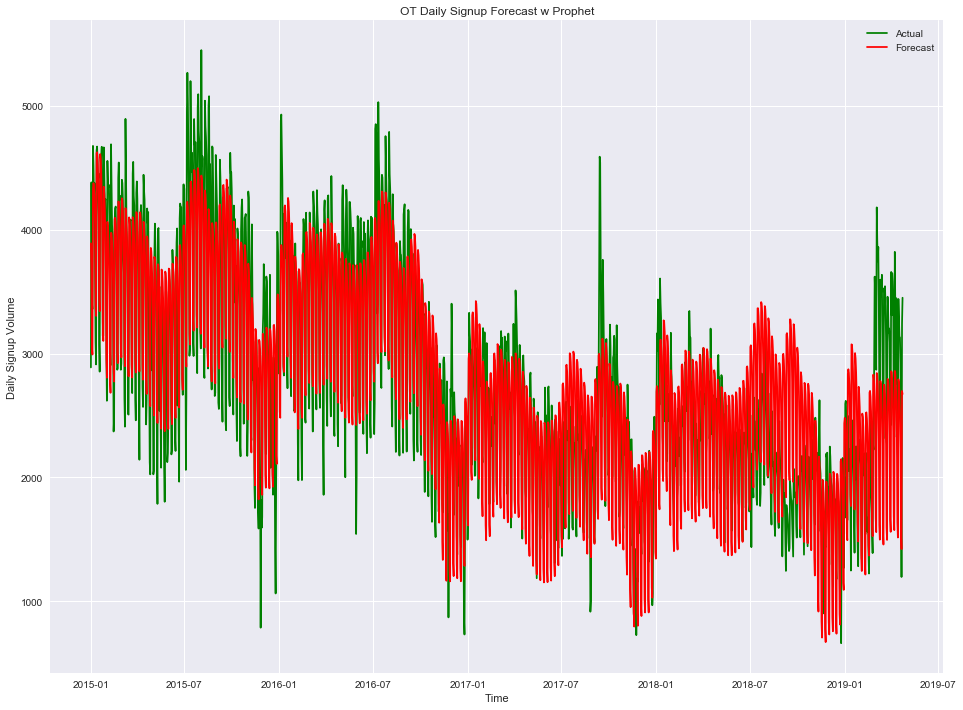

In [45]:
compare_chart(compare)

In [46]:
mape_baseline, cv_results = mape(m1)
print(mape_baseline)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2017-04-23 00:00:00 and 2017-04-23 00:00:00
C:\anaconda36\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\anaconda36\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


24.89723939404328


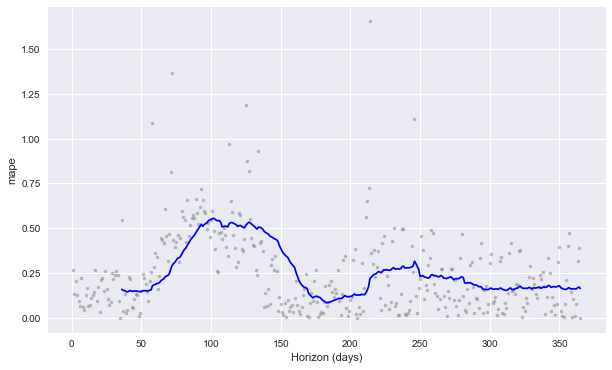

In [47]:
fig = plot_cross_validation_metric(cv_results, metric='mape', rolling_window=.1)

### 4) 2. Model with Customized Seasonality

In [50]:
m2 = Prophet(growth='linear',
             seasonality_mode='additive',
             changepoint_range=0.9, #default 0.8
             n_changepoints=30, #default is 25
             changepoint_prior_scale=0.12, # default 0.05
             holidays_prior_scale=10,
             daily_seasonality=False,
             weekly_seasonality=False,
             yearly_seasonality=False
           ).add_seasonality(name='monthly', period=30.5, fourier_order=12
                            ).add_seasonality(name='weekly', period=7, fourier_order=7
                            ).add_seasonality(name='yearly', period=365.25, fourier_order=20
                            ).add_seasonality(name='quarterly', period=365.25/4, fourier_order=4, prior_scale=15)
            
m2.fit(df)

C:\anaconda36\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\anaconda36\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


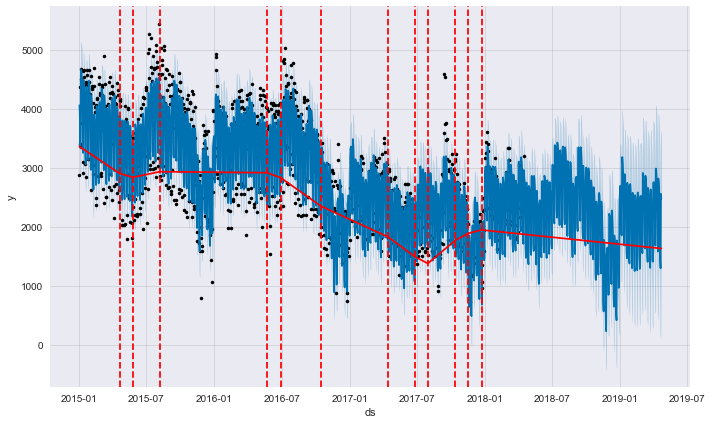

In [51]:
future = m2.make_future_dataframe(periods=365)
forecast = m2.predict(future)
fig2_1 = m2.plot(forecast)
a = add_changepoints_to_plot(fig2_1.gca(), m2, forecast)

In [52]:
mape_baseline, cv_results = mape(m2)
print(mape_baseline)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2017-04-23 00:00:00 and 2017-04-23 00:00:00
C:\anaconda36\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\anaconda36\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


25.038892476833624


### 4) 3. Model with Customized Changepoint

In [353]:
changepoint_list = list(test_changepoint[np.abs(test_changepoint['deltas'])>0.0001]['ds'])

C:\anaconda36\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\anaconda36\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


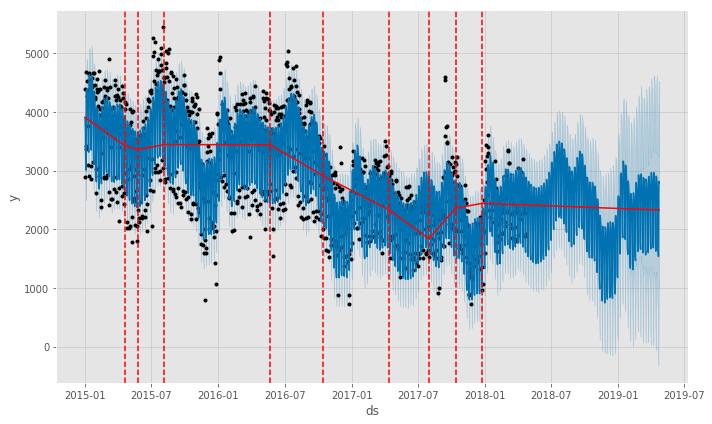

In [354]:
# Changepoints must fall within training data
m3 = Prophet(growth='linear', 
             seasonality_mode='additive',
             changepoints=changepoint_list, 
             changepoint_prior_scale=0.12,
             holidays_prior_scale=10
           )
            
m3.fit(df)

future = m3.make_future_dataframe(periods=365)
forecast = m3.predict(future)
fig3_1 = m3.plot(forecast)
a = add_changepoints_to_plot(fig3_1.gca(), m3, forecast)

In [356]:
m3.changepoints

DatetimeIndex(['2015-04-20', '2015-05-26', '2015-08-06', '2016-05-22',
               '2016-06-28', '2016-10-14', '2017-04-13', '2017-06-25',
               '2017-07-31', '2017-10-12', '2017-11-17', '2017-12-23'],
              dtype='datetime64[ns]', freq=None)

In [357]:
mape_baseline, cv_results = mape(m3)
print(mape_baseline)

INFO:fbprophet:Making 1 forecasts with cutoffs between 2017-04-23 00:00:00 and 2017-04-23 00:00:00
C:\anaconda36\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
C:\anaconda36\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


24.529504225785946


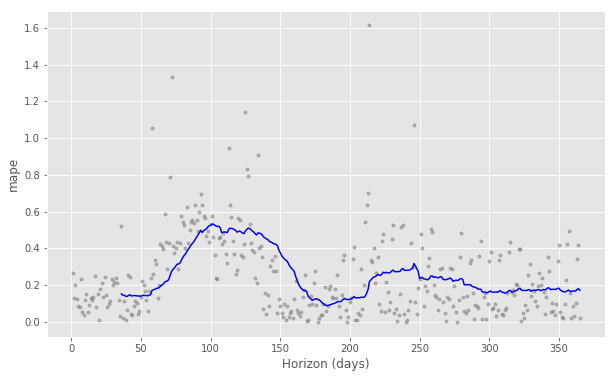

In [358]:
fig = plot_cross_validation_metric(cv_results, metric='mape', rolling_window=.1)

In [359]:
compare2 = pd.merge(df2, forecast[['ds','yhat']], on='ds', how='left')

In [362]:
compare2.tail(10)

,ds,y,yhat
1564,2019-04-14,2167,1625.350609
1565,2019-04-15,3440,2902.385996
1566,2019-04-16,3302,2877.461637
1567,2019-04-17,3135,2791.477183
1568,2019-04-18,3130,2636.605768
1569,2019-04-19,2927,2348.166193
1570,2019-04-20,2148,1657.270626
1571,2019-04-21,1197,1536.501982
1572,2019-04-22,3241,2813.177680
1573,2019-04-23,3450,2788.752209


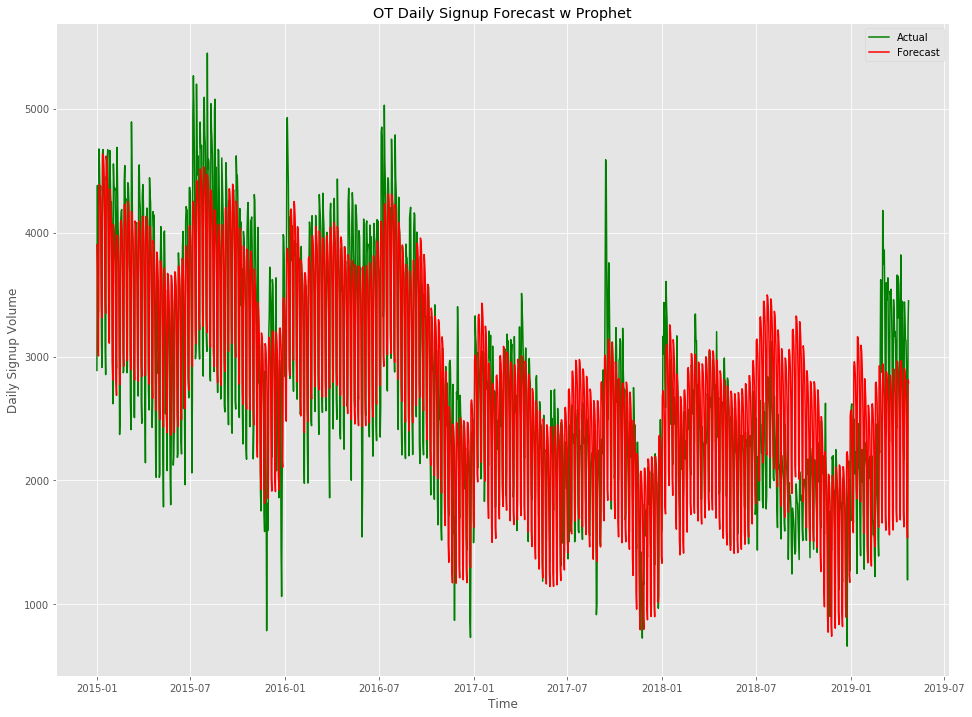

In [361]:
compare_chart(compare2)

In [243]:
df.set_index('ds', inplace=True)
forecast.set_index('ds', inplace=True)
viz_df = df.join(forecast[['yhat', 'yhat_lower','yhat_upper']], how='outer')

In [245]:
viz_df.tail(10)

,y,yhat,yhat_lower,yhat_upper
ds,,,,
2019-04-14,NaN,1625.350609,-74.821616,3186.465936
2019-04-15,NaN,2902.385996,1141.591059,4484.012265
2019-04-16,NaN,2877.461637,1219.313598,4541.232113
2019-04-17,NaN,2791.477183,1042.376370,4431.618138
2019-04-18,NaN,2636.605768,912.153629,4295.381418
2019-04-19,NaN,2348.166193,548.041369,3995.213055
2019-04-20,NaN,1657.270626,-59.027830,3284.288727
2019-04-21,NaN,1536.501982,-213.885651,3196.616133
2019-04-22,NaN,2813.177680,1060.734158,4513.194883


In [246]:
df.index = pd.to_datetime(df.index)
last_date = df.index[-1]

In [251]:
plt.rcParams['figure.figsize']=(20,10)
plt.style.use('ggplot')

In [258]:
from datetime import date,timedelta

def plot_data(func_df, end_date):
    end_date = end_date - timedelta(days=365) # find the 2nd to last row in the data. We don't take the last row because we want the charted lines to connect
    mask = (func_df.index > end_date) # set up a mask to pull out the predicted rows of data.
    predict_df = func_df.loc[mask] # using the mask, we create a new dataframe with just the predicted data.
   
  # Now...plot everything
    fig, ax1 = plt.subplots()
    ax1.plot(df.y)
    ax1.plot((np.exp(predict_df.yhat)), color='black', linestyle=':')
    ax1.fill_between(predict_df.index, np.exp(predict_df['yhat_upper']), np.exp(predict_df['yhat_lower']), alpha=0.5, color='darkgray')
    ax1.set_title('Sales (Orange) vs Sales Forecast (Black)')
    ax1.set_ylabel('Dollar Sales')
    ax1.set_xlabel('Date')
  
   # change the legend text
    L=ax1.legend() #get the legend
    L.get_texts()[0].set_text('Actual Sales') #change the legend text for 1st plot
    L.get_texts()[1].set_text('Forecasted Sales') #change the legend text for 2nd plot

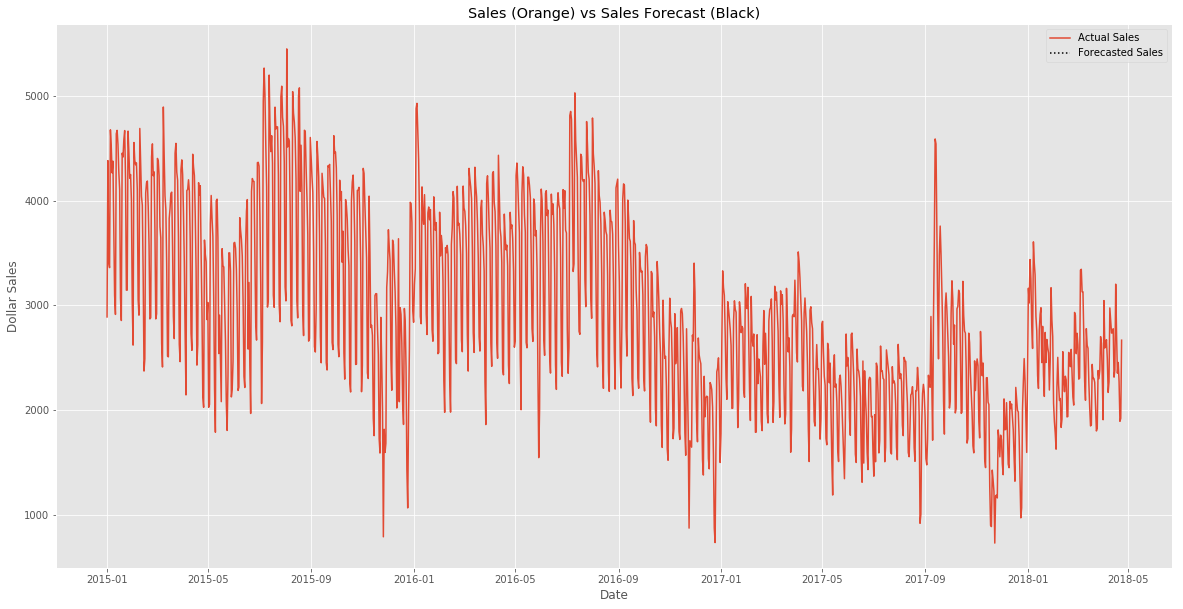

In [259]:
plot_data(viz_df, last_date)

### Holiday

In [260]:
promotions = pd.DataFrame({
  'holiday': 'december_promotion',
  'ds': pd.to_datetime(['2009-12-01', '2010-12-01', '2011-12-01', '2012-12-01',
                        '2013-12-01', '2014-12-01','2015-12-01']),
  'lower_window': 0,
  'upper_window': 0,
})

In [261]:
promotions

,holiday,ds,lower_window,upper_window
0,december_promotion,2009-12-01,0,0
1,december_promotion,2010-12-01,0,0
2,december_promotion,2011-12-01,0,0
3,december_promotion,2012-12-01,0,0
4,december_promotion,2013-12-01,0,0
5,december_promotion,2014-12-01,0,0
6,december_promotion,2015-12-01,0,0


In [ ]:
model = Prophet(holidays=promotions)
model.fit(df)

### Forecast on log transformed data

In [213]:
df = pd.read_csv(r'C:\Users\jli\Documents\JLI\Code & Examples\fbprophet\ot_signup.csv', parse_dates=['ds'], nrows=1209)

In [214]:
df2 = pd.read_csv(r'C:\Users\jli\Documents\JLI\Code & Examples\fbprophet\ot_signup.csv', parse_dates=['ds'])

In [215]:
df['y']=df.y.apply(lambda x:np.log(x))

In [216]:
df['y'].describe()

count    1209.000000
mean        7.933925
std         0.333119
min         6.590301
25%         7.724005
50%         7.928406
75%         8.217978
max         8.603004
Name: y, dtype: float64

In [217]:
m3 = Prophet(
    changepoints=changepoint_list, changepoint_prior_scale=0.12
           )
            
m3.fit(df)

C:\anaconda36\lib\site-packages\fbprophet\forecaster.py:880: FutureWarning: Series.nonzero() is deprecated and will be removed in a future version.Use Series.to_numpy().nonzero() instead
  min_dt = dt.iloc[dt.nonzero()[0]].min()
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.
C:\anaconda36\lib\site-packages\pystan\misc.py:399: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  elif np.issubdtype(np.asarray(v).dtype, float):


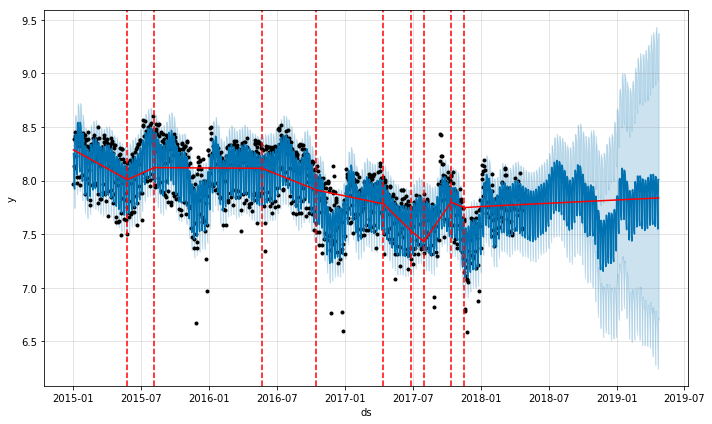

In [219]:
future = m3.make_future_dataframe(periods=365)
forecast = m3.predict(future)
fig1_1 = m3.plot(forecast)
a = add_changepoints_to_plot(fig1_1.gca(), m3, forecast)

In [220]:
forecast_data_orig = forecast # make sure we save the original forecast data
forecast_data_orig['yhat'] = np.exp(forecast_data_orig['yhat'])
forecast_data_orig['yhat_lower'] = np.exp(forecast_data_orig['yhat_lower'])
forecast_data_orig['yhat_upper'] = np.exp(forecast_data_orig['yhat_upper'])

In [221]:
compare3 = pd.merge(df2, forecast[['ds','yhat']], on='ds', how='left')

In [222]:
compare3.tail(10)

,ds,y,yhat
1564,2019-04-14,2167,1946.562298
1565,2019-04-15,3440,3094.649733
1566,2019-04-16,3302,3078.964284
1567,2019-04-17,3135,3006.029157
1568,2019-04-18,3130,2846.874357
1569,2019-04-19,2927,2610.115765
1570,2019-04-20,2148,2005.197047
1571,2019-04-21,1197,1896.791568
1572,2019-04-22,3241,3017.161294
1573,2019-04-23,3450,3004.295969


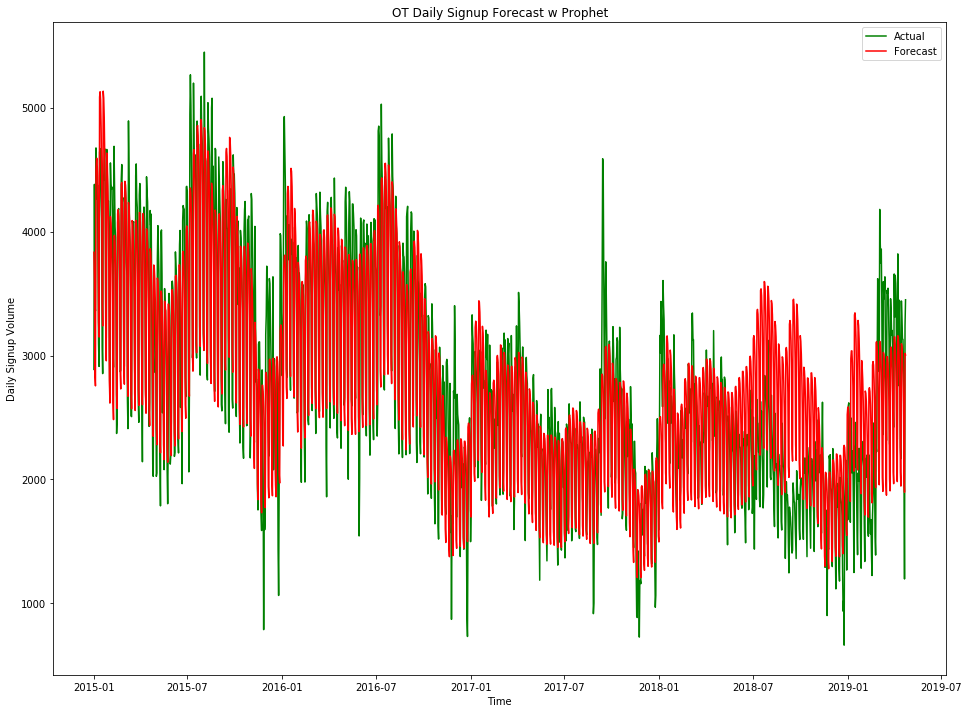

In [223]:
compare_chart(compare3)

### Saturating Forecasts

In [ ]:
df = pd.read_csv('../examples/example_wp_log_R.csv')

In [ ]:
m = Prophet(growth='logistic')
m.fit(df)

future = m.make_future_dataframe(periods=108)
future['cap']=125 #specifies the saturating maximum
future['floor'] = 110 #saturating minimum
forecast = m.predict(future)
fig = m.plot(forecast)